# Creating a Corpus

## Indeed Scraping:

Source: [Github](https://github.com/jlgamez/indeed-jobs-scraper)
[Article](https://jlgamez.com/how-i-scrape-jobs-data-from-indeed-com-with-python/)

[Article 2](https://www.jobspikr.com/blog/scraping-indeed-job-data-using-python/)

### Final Data Fields:
* Job Title
* Summary
* Location
* Name of the Company
* The Date posted
* Details
* Job URL


I wrote a script to do all the scraping. In this notebook, we focus on the data processing, and EDA.

In [1]:
# %%capture
## All my imports
print("Versions")
# Data science
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")
# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import os
# Text Stuff
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# nltk.download("stopwords")

Versions
Pandas: 1.2.1
Numpy: 1.19.2


# Data Ingestion and Wrangling (ETL)

# 1. Indeed

In [65]:
# Ingesting the data from the Indeed scraping

indeed = pd.DataFrame(columns = ['date', 'details', 'location', 'summary', 'title', 'url', 'rating'])

for file in [i for i in os.listdir('results') if 'data.json' in i]:
    indeed = indeed.append(pd.read_json('results/' + file))
    
# Combining the Details and Summary section from the indeed into - also adding location 
# ONE column
def combine(df):
    ''' 
    Combining the details and summary section
    Bonus: adding the location info
    '''
    location = []
    full = []
    
    for i, j, loc in zip(df['details'], df['summary'], df['location']):
        full.append(i + '\n' + j)
        
        loc = loc.lower()
        
        if "san francisco" in loc or "sf" in loc:
            location.append("san francisco")
        elif "new york" in loc or "ny" in loc:
            location.append("new york")
        elif "texas" in loc or "tx" in loc:
            location.append("texas")
        else:
            location.append("other")
            
    return pd.DataFrame({'Title': df['title'], 'Description': full, 
                        'Location': location})

# Narrowing down to the parts we want and updating the changes into the 
# indeed object
indeed = combine(indeed)
indeed.head()

Title                                        Description  \
0           Data Scientist  Data Scientist\n\nChange Research is innovatin...   
1  Data Science-Consultant  Key skills required for the job are: n Data Sc...   
2           Data Scientist  This role applies skills as a seasoned, experi...   
3   Intern: Data Scientist  Position Overview:\nThe Climate Corporation’s ...   
4       Ads Data Scientist  eBay Inc. is a global commerce leader that con...   

        Location  
0  san francisco  
1  san francisco  
2  san francisco  
3  san francisco  
4  san francisco

In [66]:
indeed['Location'].value_counts()

new york         756
san francisco    536
texas            195
Other            183
Name: Location, dtype: int64

In [32]:
indeed_cut.shape

(1670, 2)

# 2. LinkedIn

In [73]:
# Ingesting the data from the LinkedIn scraping, and aggregating 
# them all to one dataframe

linkedin = pd.DataFrame(columns = ["Title", "Description", "Company Name", "Location", "Industry", 
                                   "Job Functions", "Time Posted", "Employment Type", "Applicant Count"])

for file in [i for i in os.listdir('results') if 'job_scraping' in i]:
    linkedin = linkedin.append(pd.read_csv('results/' + file))
    
    
# Location simplification
location = []
for loc in linkedin['Location']:

    loc = loc.lower()

    if "san francisco" in loc or "sf" in loc:
        location.append("san francisco")
    elif "new york" in loc or "ny" in loc:
        location.append("new york")
    elif "texas" in loc or "tx" in loc:
        location.append("texas")
    else:
        location.append("other")
    
    
print(linkedin['Location'].value_counts())
linkedin['Location'] = location

linkedin.drop('Unnamed: 0', axis = 1, inplace = True)

\n            Cupertino, CA\n                                8
\n            Austin, TX\n                                   7
\n            Seattle, WA\n                                  3
\n            Southfield, MI\n                               3
\n            New York, NY\n                                 3
\n            Mountain View, CA\n                            2
\n            Washington, DC\n                               1
\n            Nashville Metropolitan Area\n                  1
\n            New York City Metropolitan Area\n              1
\n            Utica-Rome Area\n                              1
\n            Tonawanda, NY\n                                1
\n            San Francisco Bay Area\n                       1
\n            Menlo Park, CA\n                               1
Name: Location, dtype: int64


In [70]:
linkedin.head()

Title  \
0                                   Data Scientist   
1                                   Data Scientist   
2                                   Data Scientist   
3                Data Scientist, Product Analytics   
4  Search Data Scientist, Apple App Store - Austin   

                                         Description  \
0  \n\n\nThis position can be based remotely anyw...   
1  \n\nSummary\n \nImagine what you could do here...   
2  \nLead analytics and measurement efforts for s...   
3  \nAbout Gusto\n\nGusto is a modern, online peo...   
4  \n\nSummary\n \nAt Apple, new ideas have a way...   

                       Company Name  Location  \
0                 Linde              new york   
1                 Apple                 texas   
2                Merkle                 other   
3                 Gusto                 other   
4                 Apple                 texas   

                                            Industry  \
0                           Oil & Energy               
1                   Consumer Electronics               
2                Marketing & Advertising               
3                      Computer Software               
4                   Consumer Electronics               

                                      Job Functions  \
0                Information Technology               
1                           Engineering               
2                     Strategy/Planning               
3                              Internet               
4                           Engineering               

                          Time Posted                     Employment Type  \
0               2 weeks ago                           Entry level           
1              12 hours ago                               Full-time         
2                5 days ago                      Mid-Senior level           
3              21 hours ago                           Entry level           
4              21 hours ago                               Full-time         

                                    Applicant Count  
0                    199 applicants                  
1                     12 applicants                  
2                     54 applicants                  
3                     27 applicants                  
4                      7 applicants

In [71]:
linkedin['Location'].value_counts()

other            20
texas             7
new york          5
san francisco     1
Name: Location, dtype: int64

# Merging
Now we want to combine both the indeed and LinkedIn data into one dataframe containing very similar formats.

In [77]:
merged = pd.concat([linkedin[['Title', 'Description', 'Location']], indeed])
merged['Title'].value_counts()[:20]

Data Scientist                                       93
Data Analyst                                         70
Senior Data Scientist                                49
Senior Data Analyst                                  48
Business Analyst                                     39
Machine Learning Engineer                            19
Business Intelligence Analyst                        16
Lead Data Scientist                                  10
Product Data Analyst                                  9
Quantitative Researcher                               8
Data Engineer                                         7
Statistician                                          6
Data Science Intern                                   6
Senior Marketing Data Analyst                         6
Senior Business Analyst                               6
Principal Data Scientist                              6
Product Analyst, Data Science                         5
Senior Data Analyst - Visualization and Reportin

In [82]:
# Now I add a label based on the job title
titles = []
for title in merged['Title']:
    title = title.lower()
    
    if "data analyst" in title:
        titles.append("data analyst")
    elif "data scientist" in title:
        titles.append("data scientist")
    elif "business analyst" in title:
        titles.append("business anlayst")
    elif "machine learning" in title:
        titles.append("machine learning")
    elif "data engineer" in title:
        titles.append("data engineer")
    else:
        titles.append("other")
merged["Job Title"] = titles
merged.drop("Title", axis = 1, inplace = True)

TODO: Compare business intelligence analyst to data analyst? See if they look similar enough for us to put together. Same for MLE and DS.

In [83]:
merged

Description  Location  \
0    \n\n\nThis position can be based remotely anyw...  new york   
1    \n\nSummary\n \nImagine what you could do here...     texas   
2    \nLead analytics and measurement efforts for s...     other   
3    \nAbout Gusto\n\nGusto is a modern, online peo...     other   
4    \n\nSummary\n \nAt Apple, new ideas have a way...     texas   
..                                                 ...       ...   
355  The New York Post is searching for a web analy...  new york   
356  The Metro Group, Inc., is an established, succ...  new york   
357  It's fun to work in a company where people tru...  new york   
358  Summary\nThe Business Intelligence (BI) Soluti...  new york   
359  Location: New York, New York / Global\nAbout I...  new york   

            Job Title  
0      data scientist  
1      data scientist  
2      data scientist  
3      data scientist  
4      data scientist  
..                ...  
355             other  
356  business anlayst  
357      data analyst  
358             other  
359             other  

[1703 rows x 3 columns]

# EDA

/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


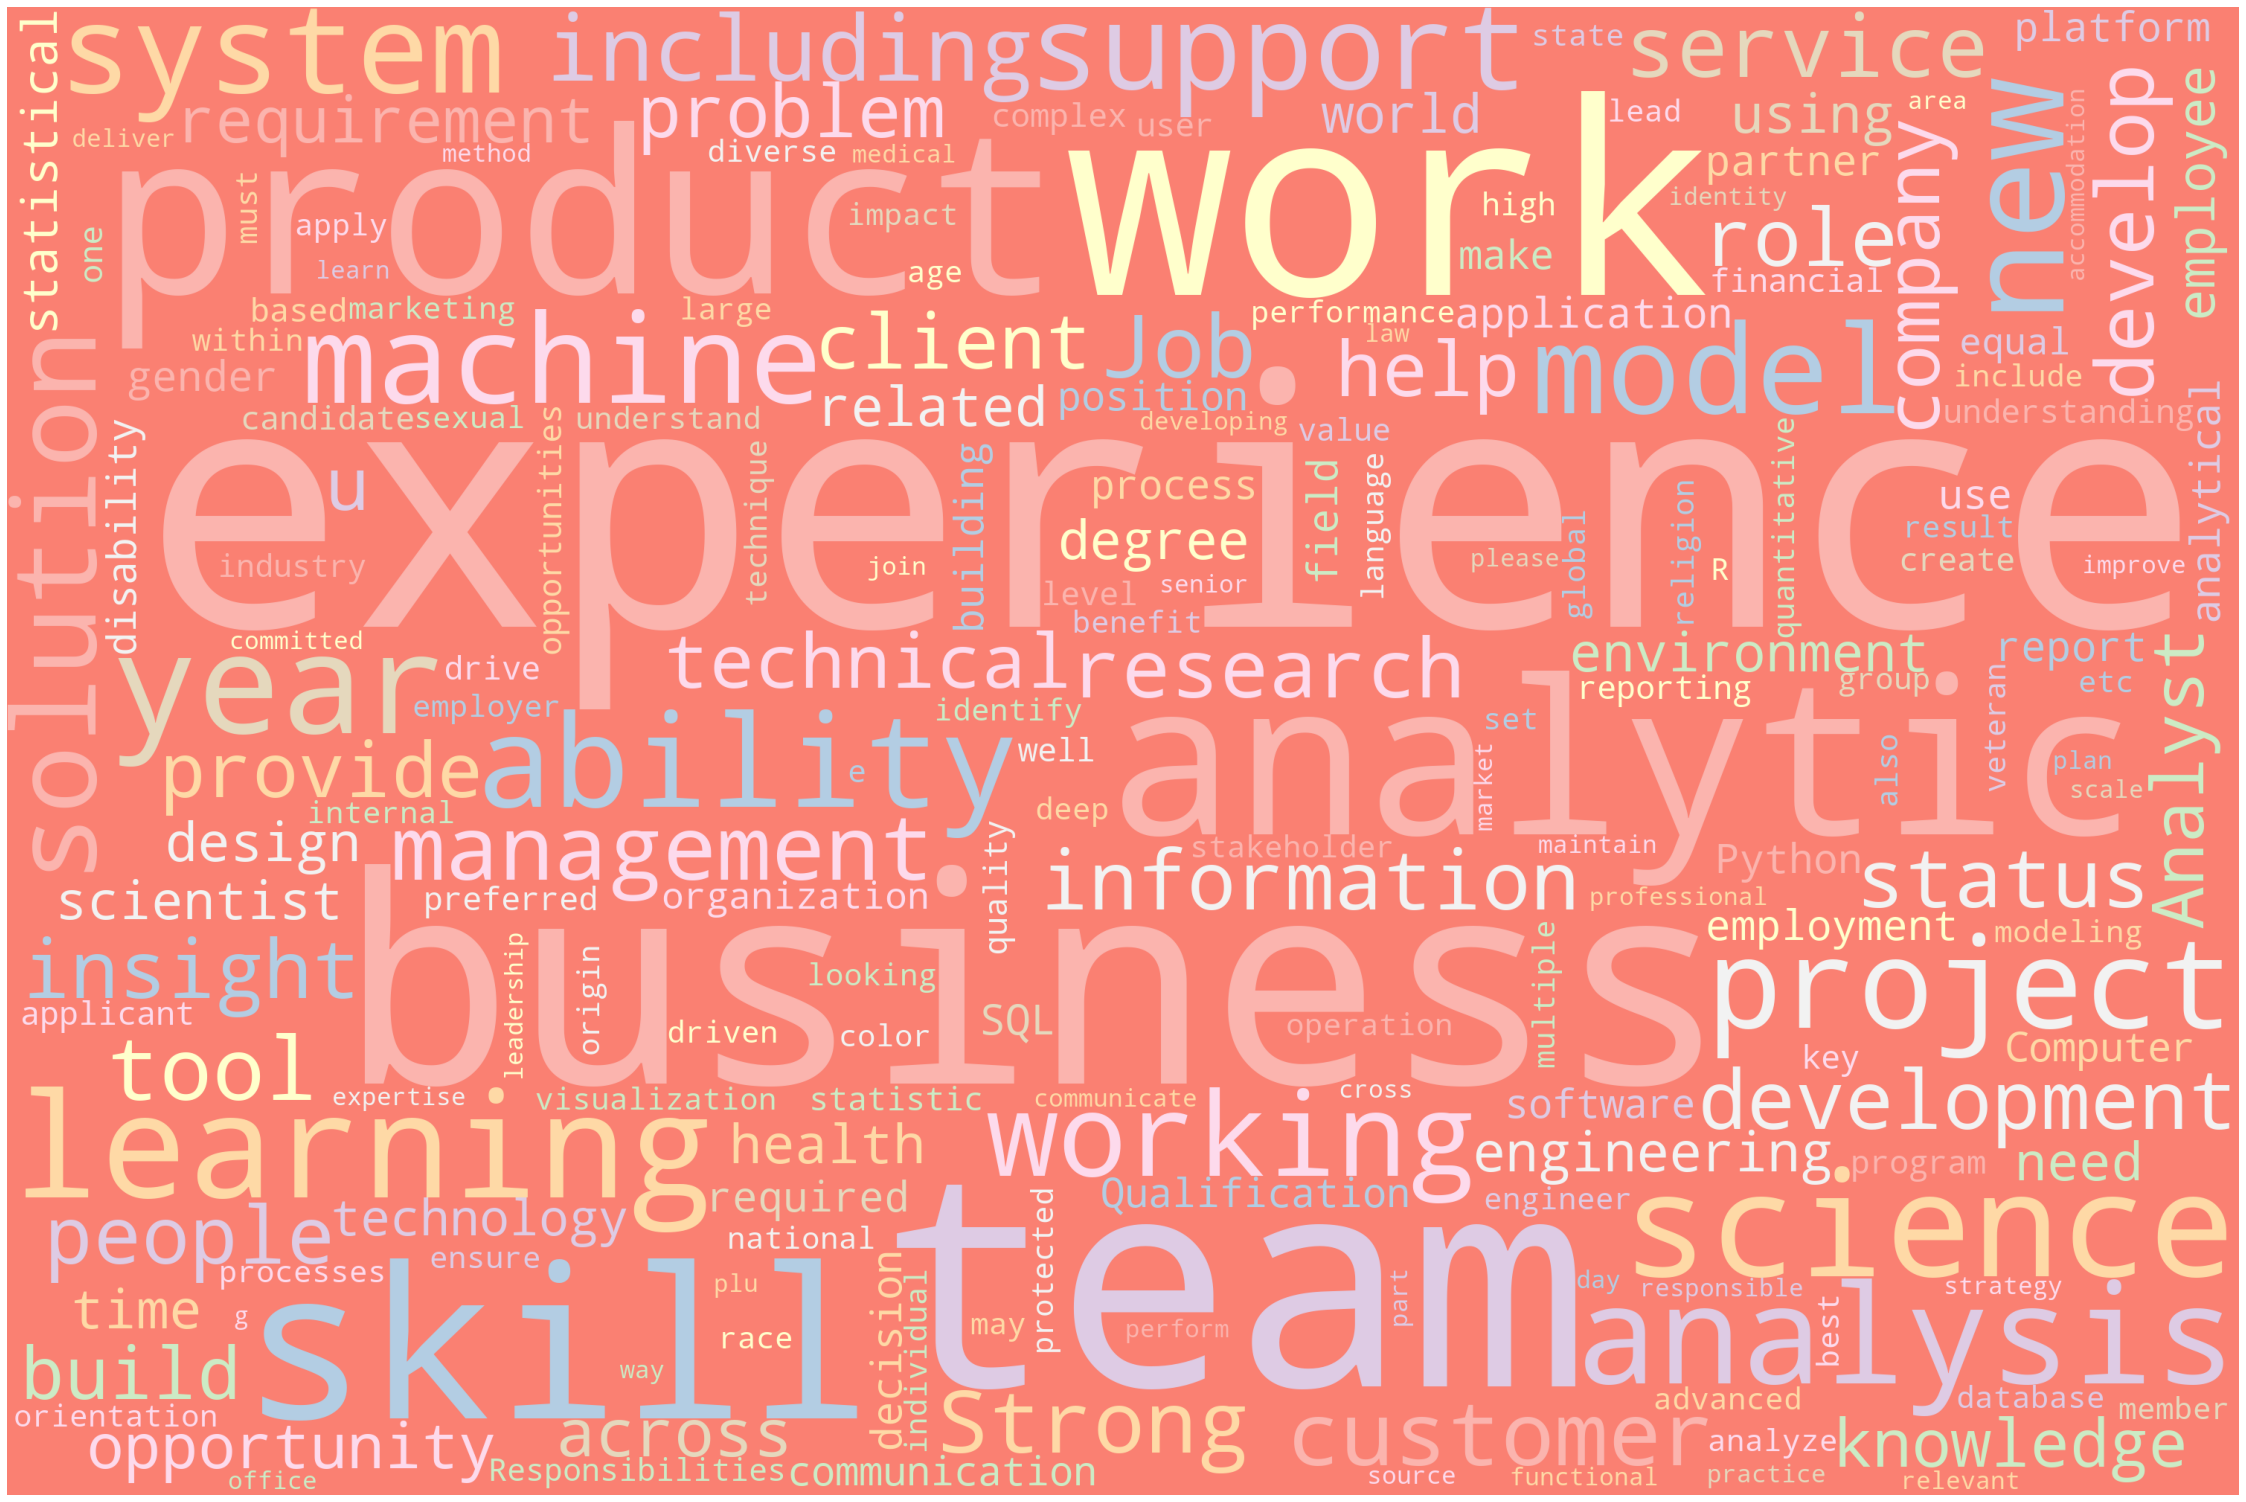

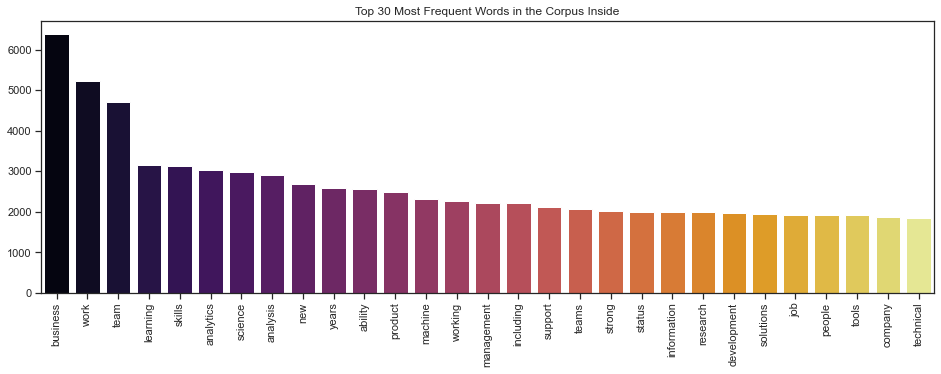

In [75]:
# Wordcloud
from wordcloud import WordCloud


# Combining entire description column into a single string

def visualize_counts(data):
    
    # NLTK stopwords
    stop = stopwords.words("english") + ["data"]
    # Manual stopwords
    my_stop = ["and", "to", "the", "of", "with", "data"]
    
    combined_corpus = ""
    for i in data["Description"]:
        combined_corpus += '\n' + i

    # Generate word cloud visualization
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop).generate(combined_corpus)

    # Visualizing with a bar graph
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
 
    n = 30
   
    # Initializing the Count Vectorizer, exluding words that appear less than 5 times
    bagofwords = CountVectorizer(min_df = 5, stop_words = stop)
    words = bagofwords.fit_transform(data['Description'])
    counts = pd.DataFrame(columns = bagofwords.get_feature_names(), data = words.toarray())
    counts.head()

    # Getting word frequencies
    frequencies = counts.sum().sort_values(ascending = False)[1:n]

    # Visualizing
    plt.figure(figsize = (16, 5))
    sns.barplot(frequencies.index, frequencies.values, palette = 'inferno')
    plt.xticks(rotation = 90)
    plt.title(f"Top {n} Most Frequent Words in the Corpus Inside")
    plt.show()
    
    return counts
    
    
visualize_counts(merged);

Nice! Now we can see the top words in a visually nice way with wordclouds. 

# Comparing Data Scientist vs Data Analyst

/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


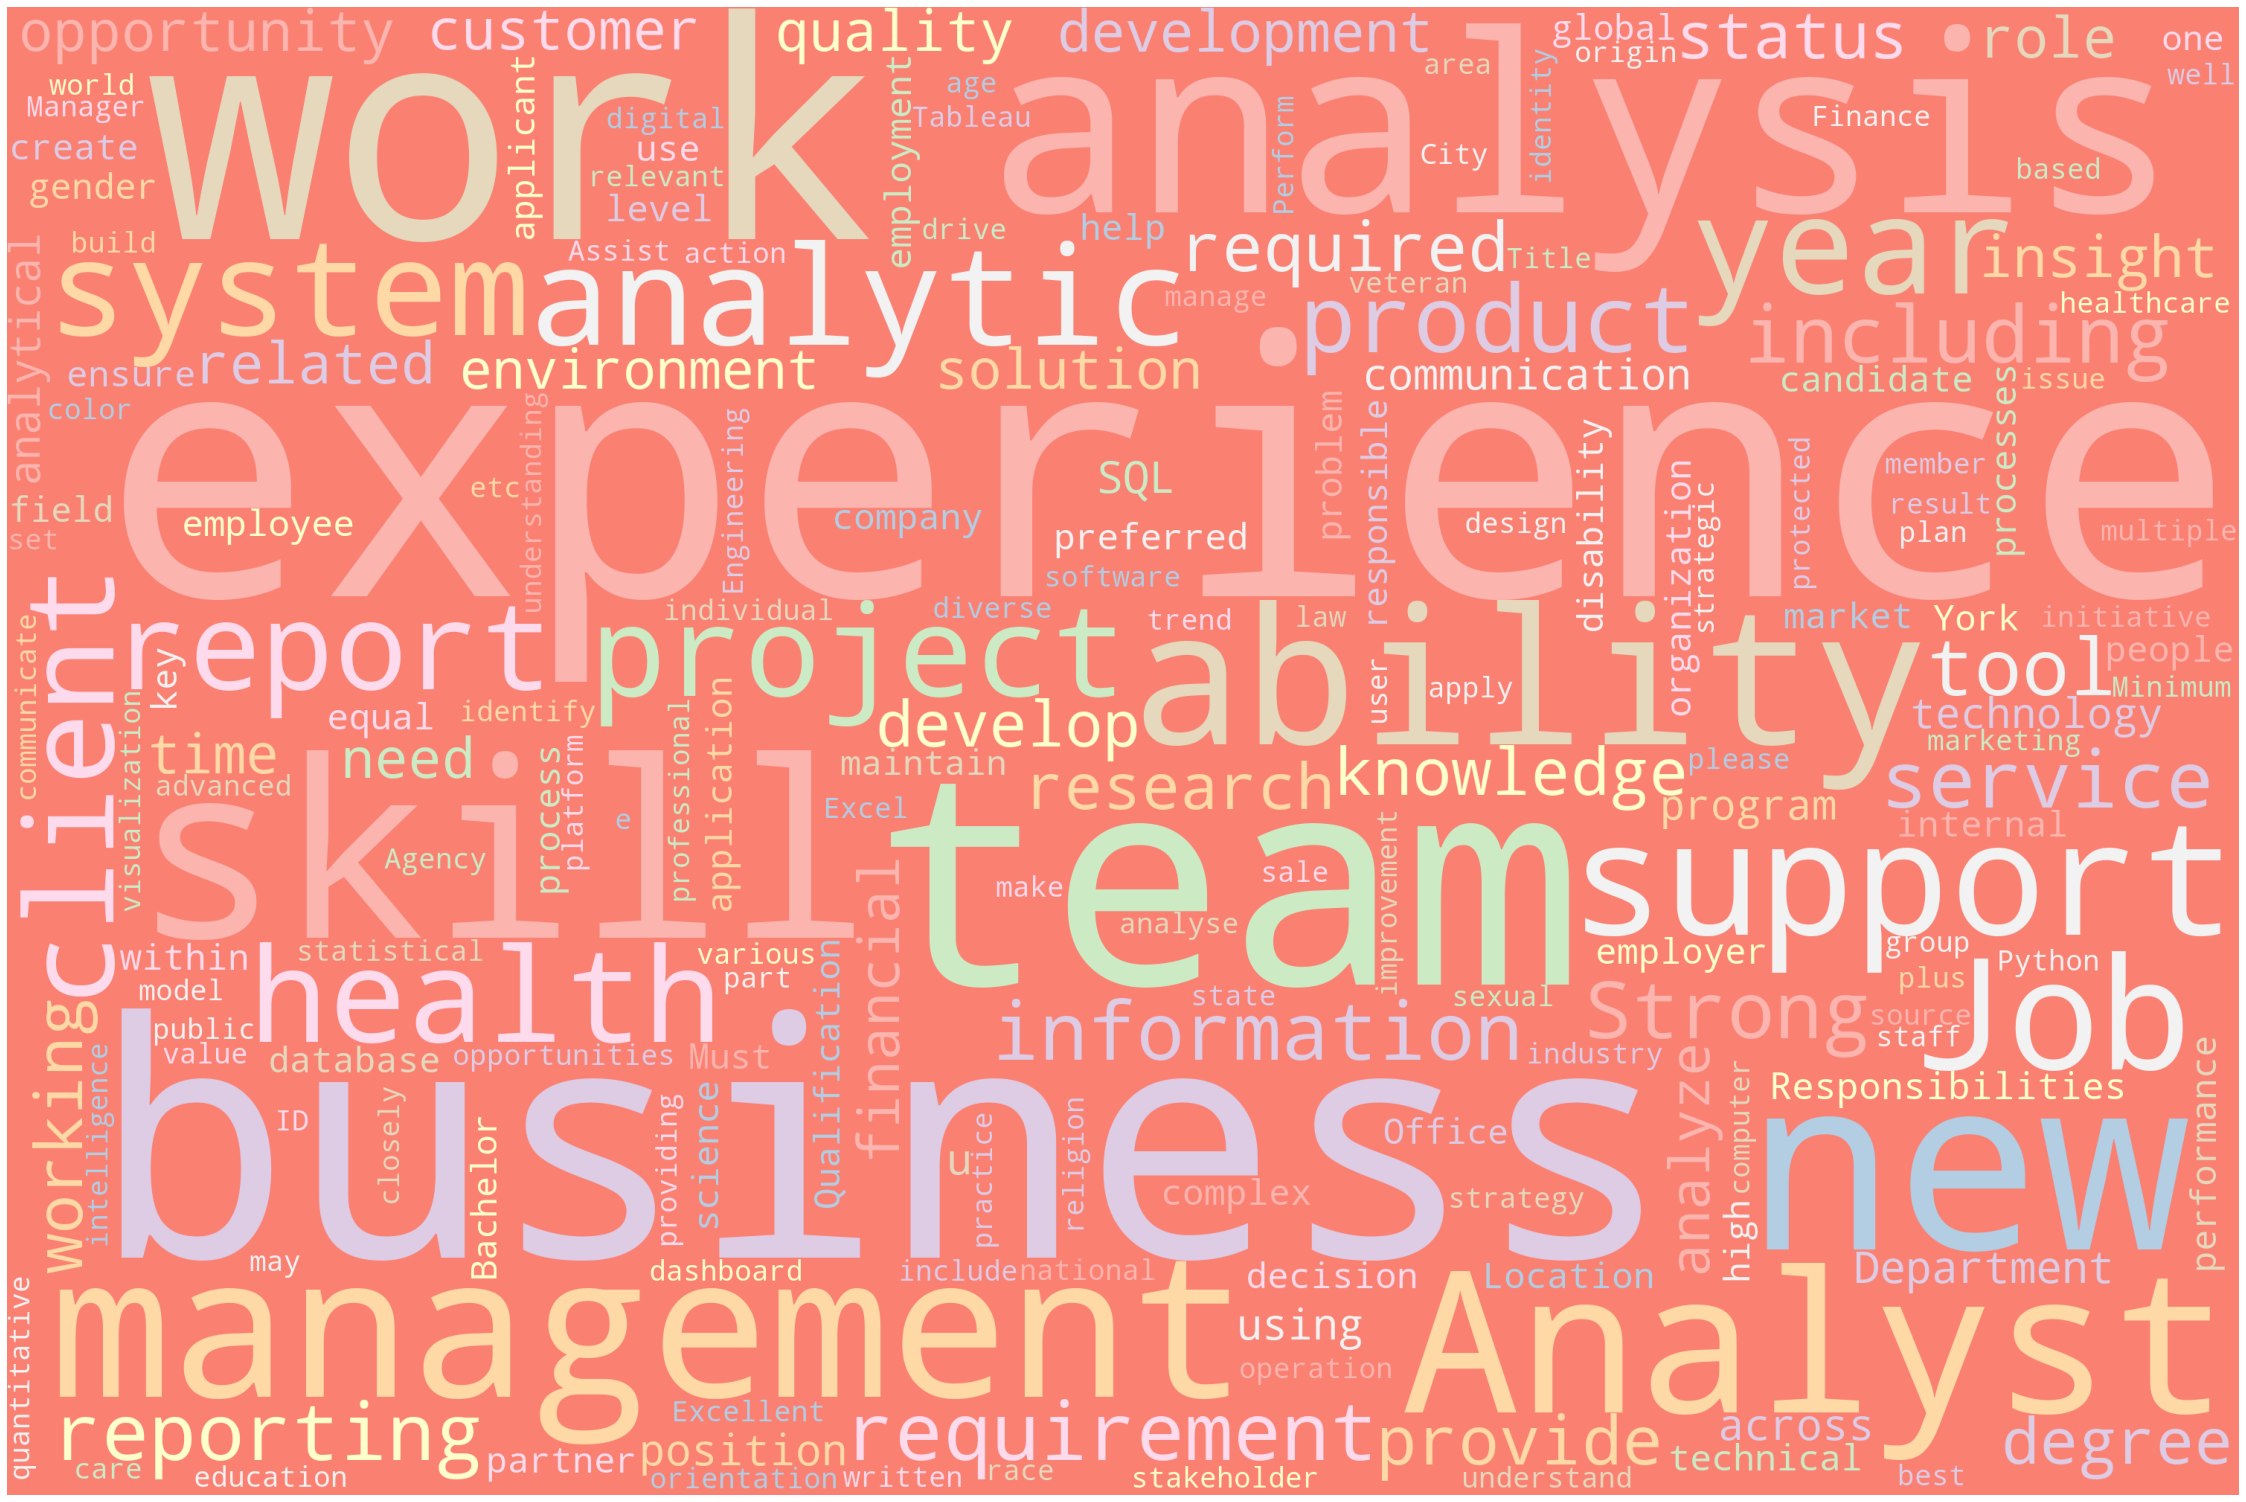

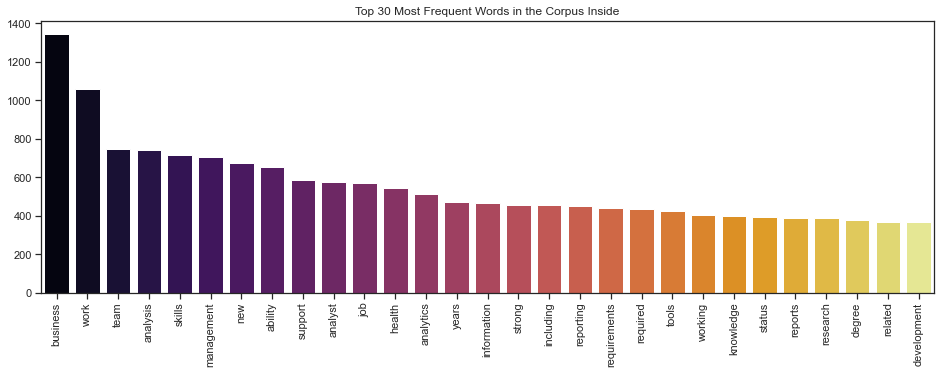

/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


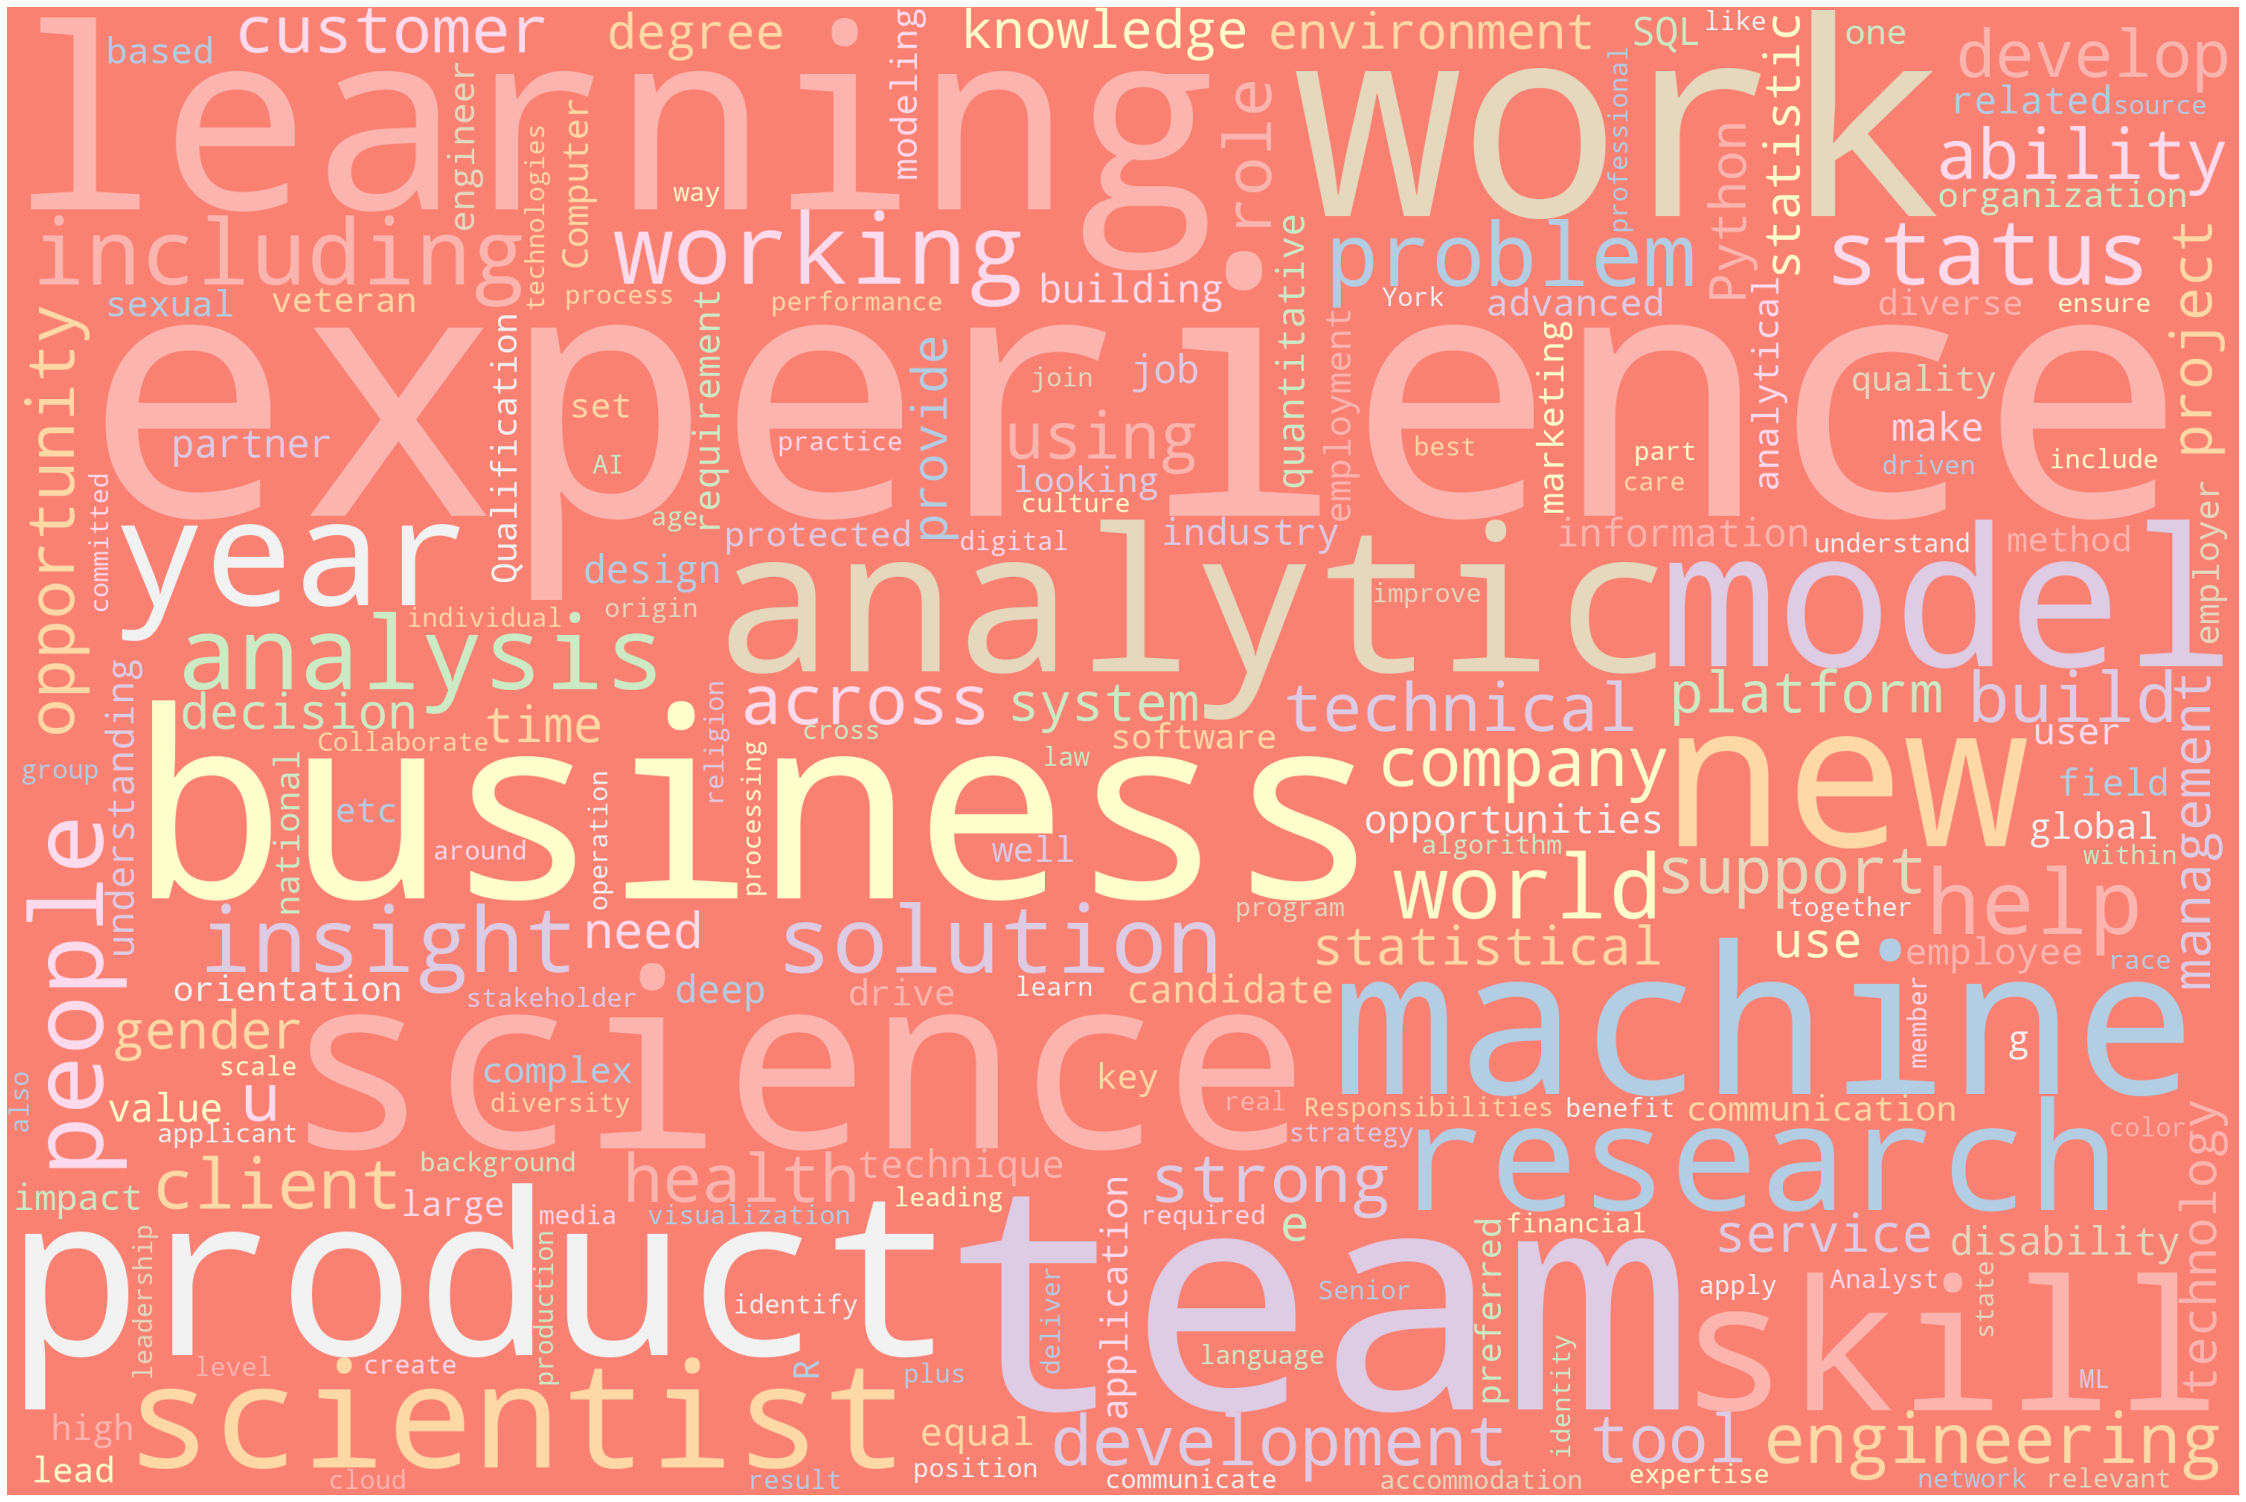

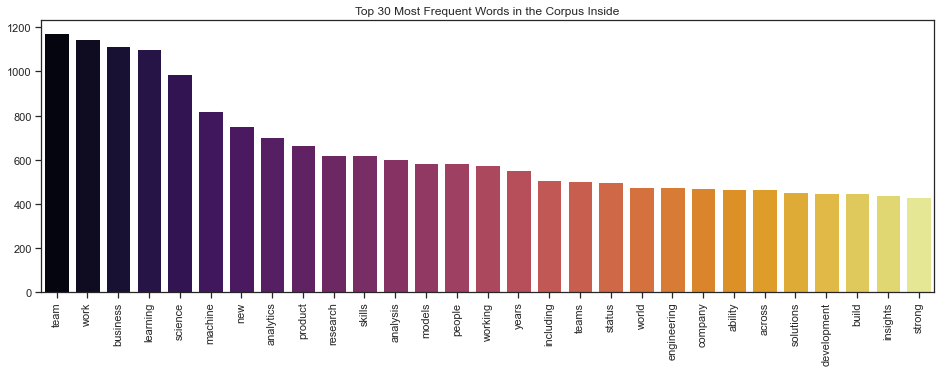

/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


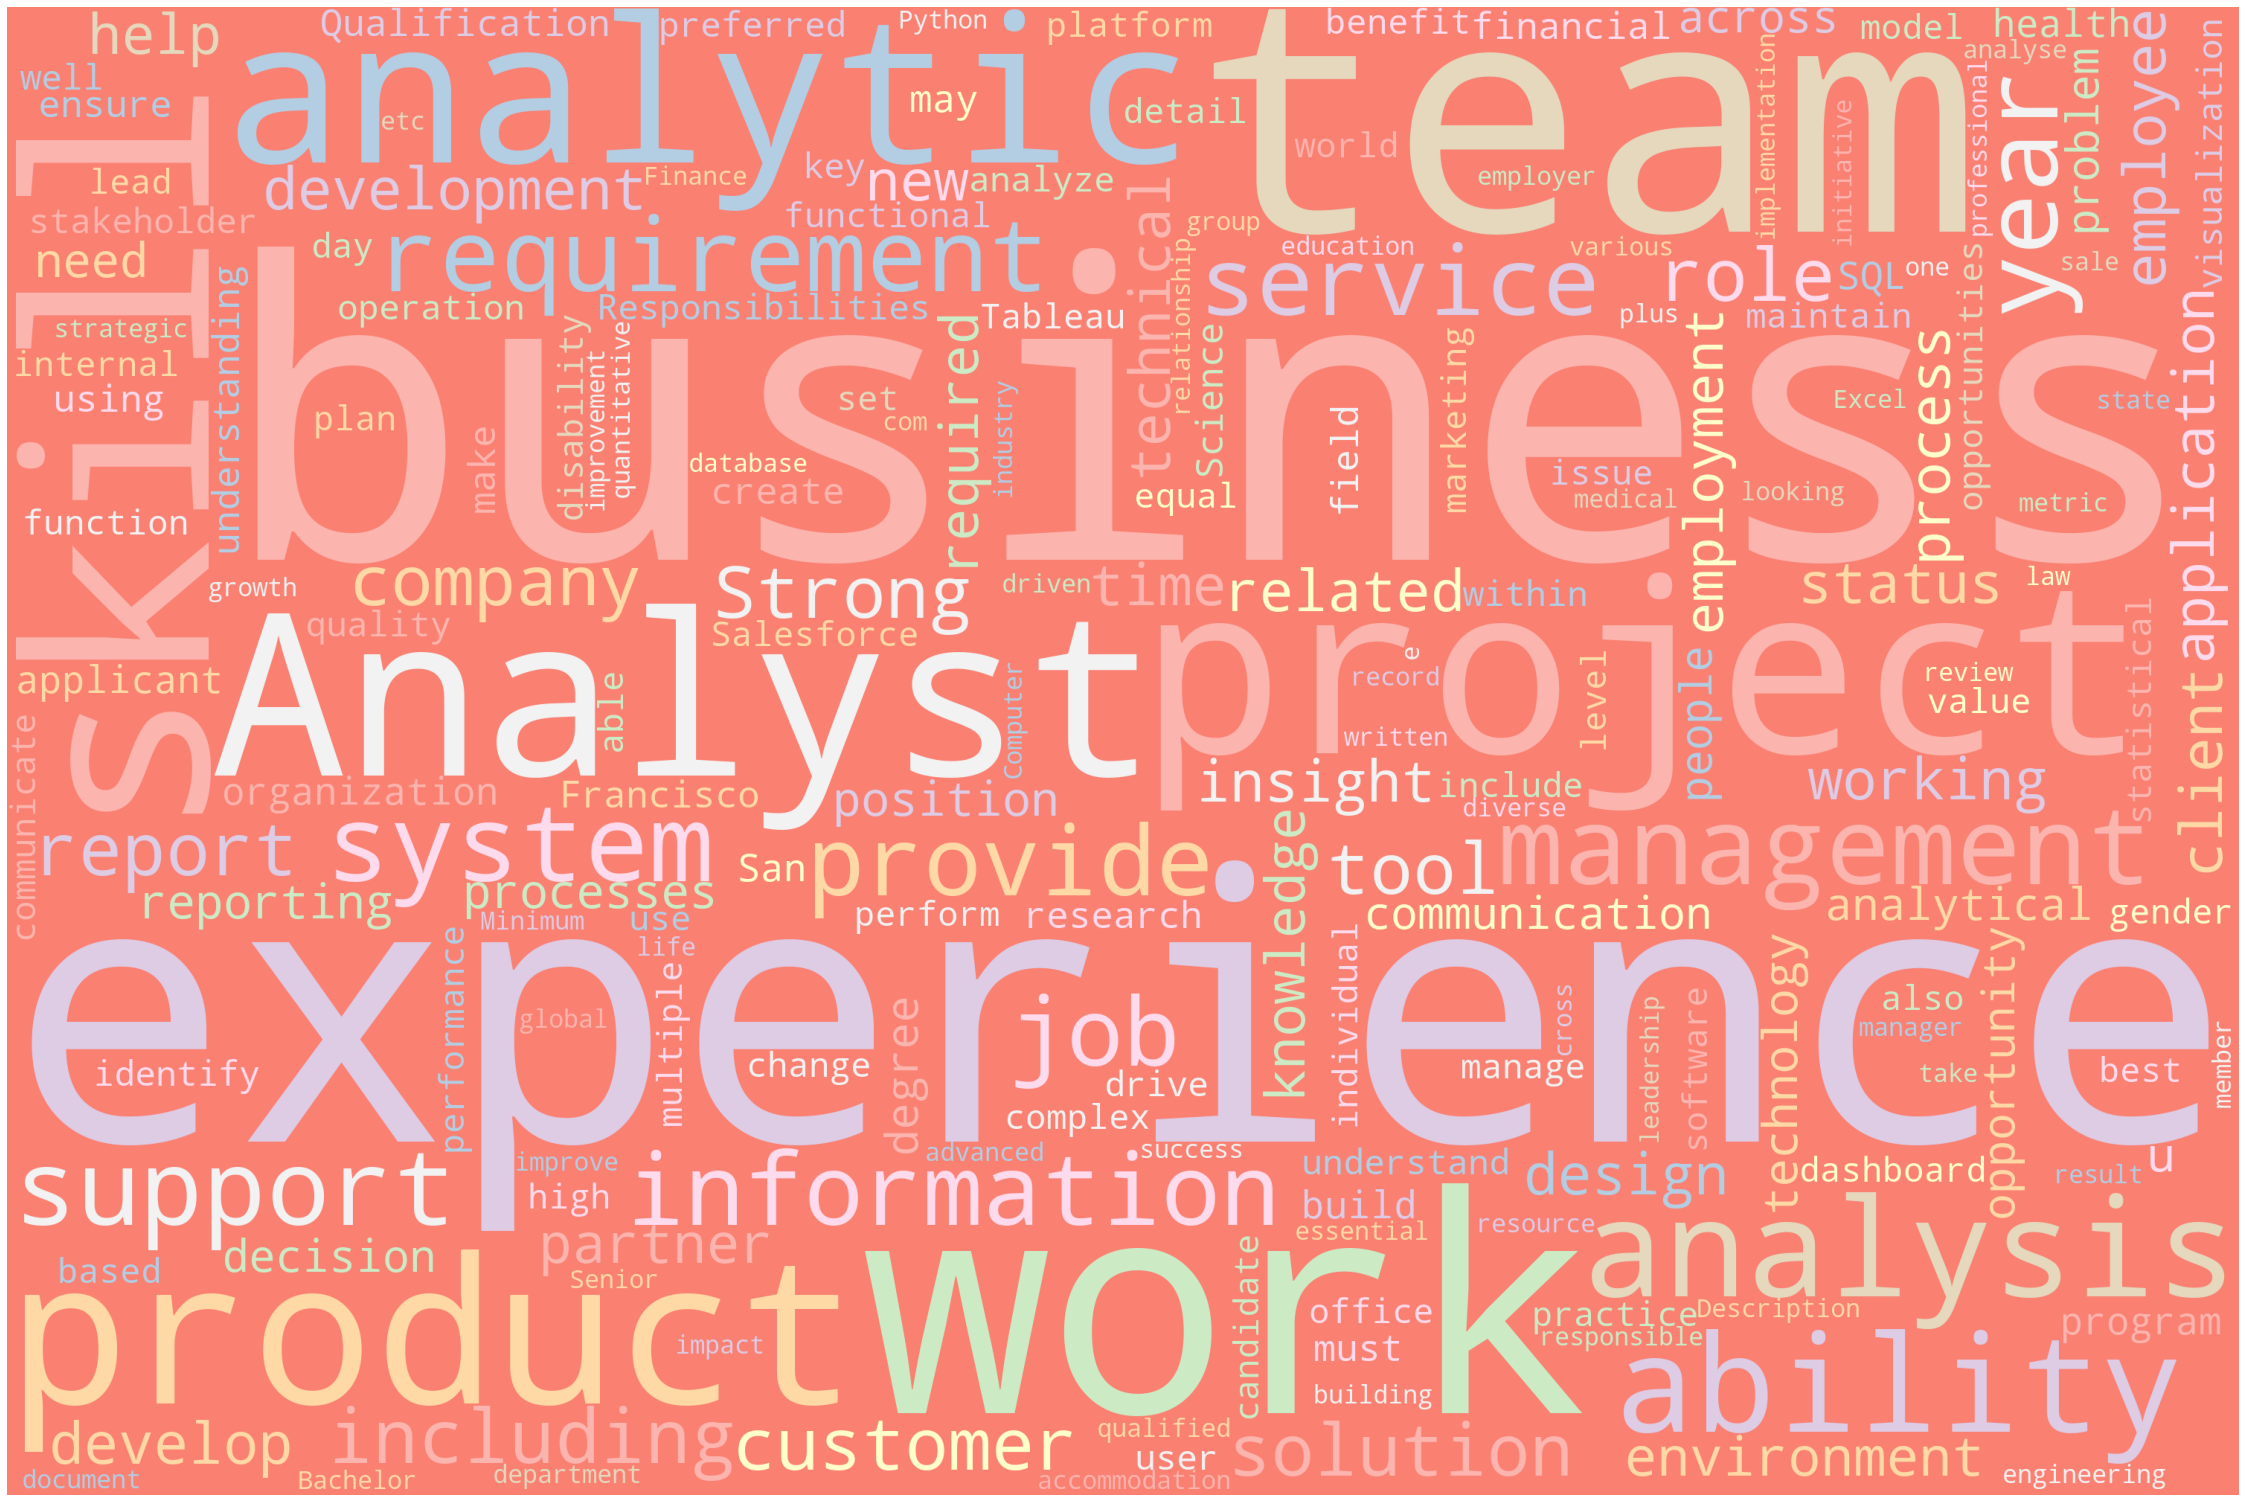

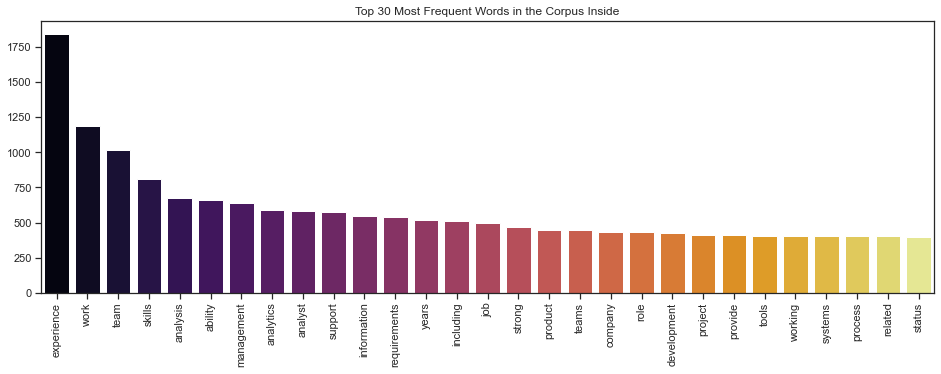

/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


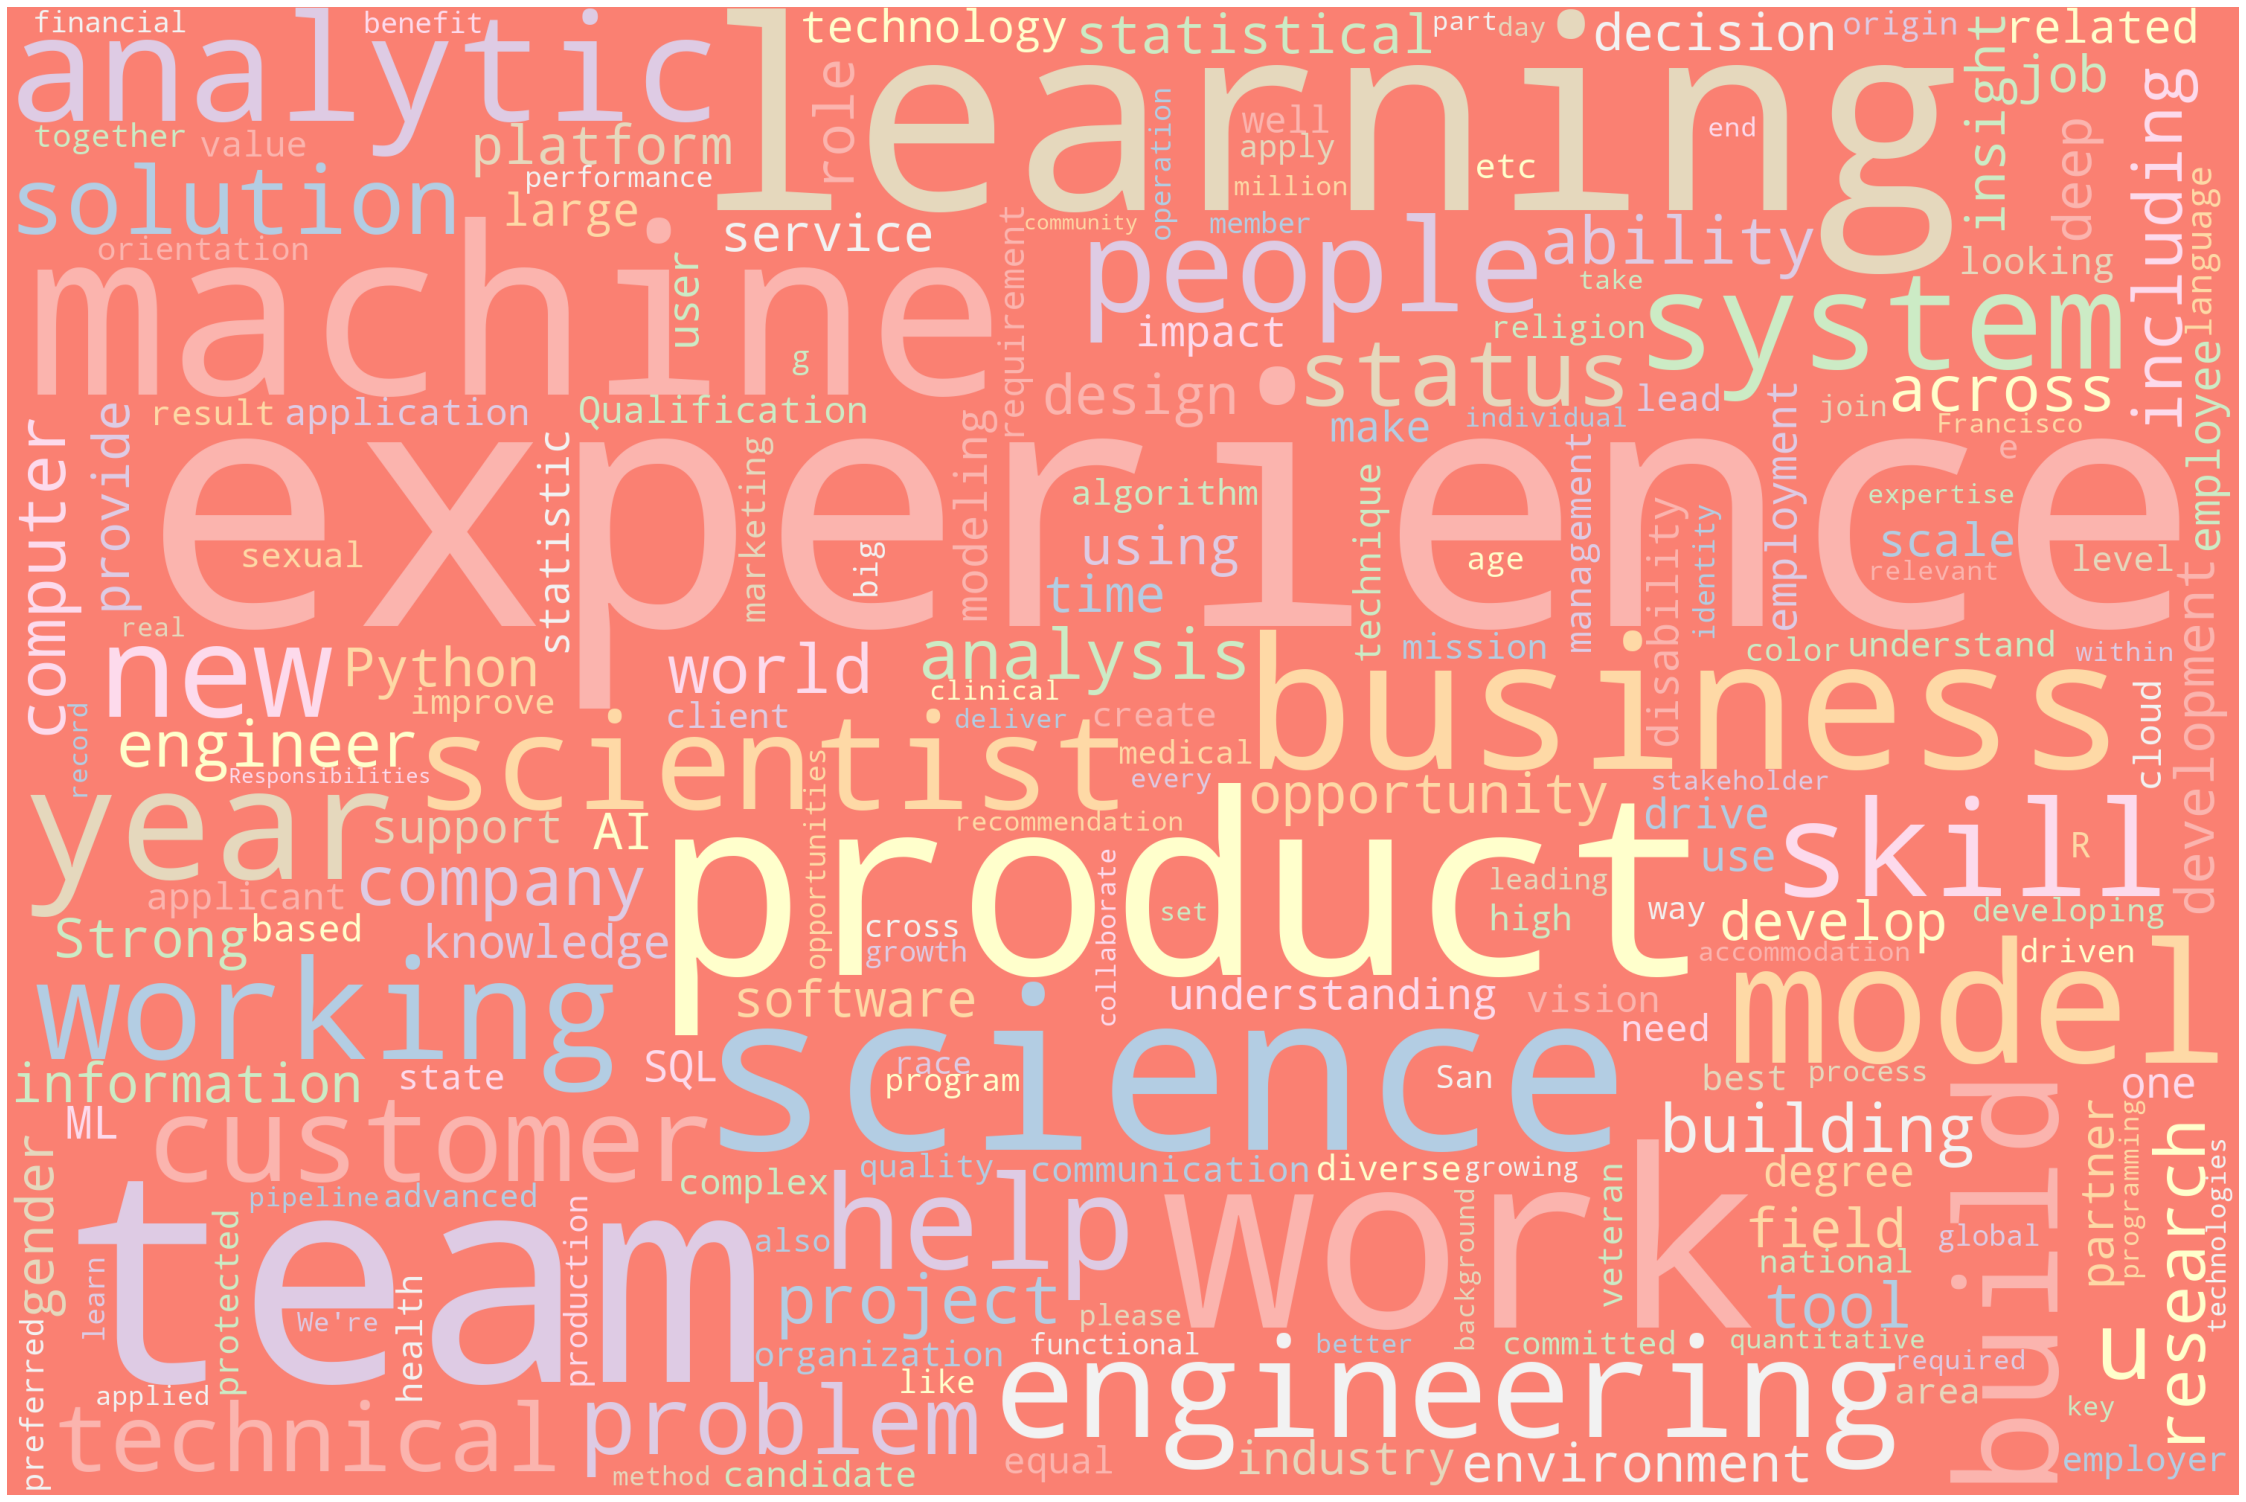

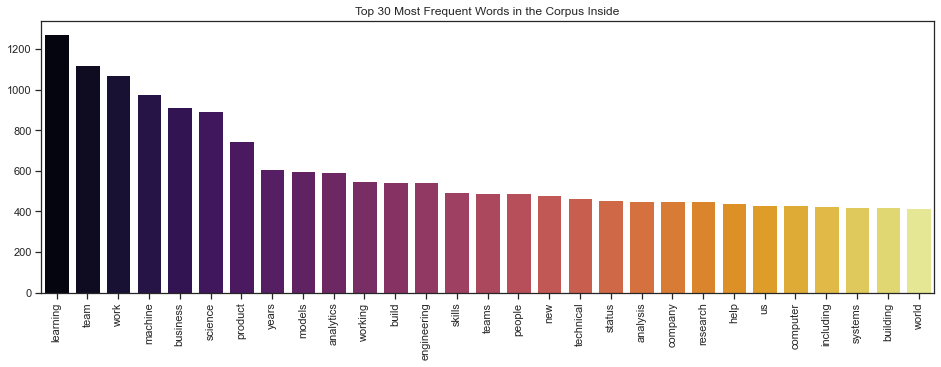

In [10]:
# Visualizing words
da_words = visualize_counts(da)
ds_words = visualize_counts(ds)
da_sf_words = visualize_counts(da_sf)
ds_sf_words = visualize_counts(ds_sf)

# Header Seperation

Here, we wish to remove the header and make it in it's own qualitative variable. In order to do this, we have to think: what constitutes a header? Here are some characteristics:

* It usually is much shorter in token length
* It usually contains a certain set of "headliny" words

Based on these two features alone, I bet that we can code up this separation.

If this doesn't work, we can take a very likely set of the headliny words, then for every headliny word seen, we can increase the probability that it would be a headliny word. I have a feeling something simple like Naive Bayes classifier for headliny word would already be very accurate.

In [84]:
# Unit testing check function

vocab = ["Job", "Location", "Qualifications", "Perks", "Impact", "About", "Description", 
         "Compensation", "Why", "Summary", "Skills", "Preferred", "Who", "Requirements",
        "Opportunity"]
vocab = [i.lower() for i in vocab]

def check(sent, vocab):
    ''' Checks if the heading vocab is inside the sentence you feed it in '''
    contains = False
    for word in vocab:
        evaluate = [word in i for i in sent]
        if True in evaluate:
            contains = True
            break
    return contains

a = ['This', 'position', 'can', 'be', 'based', 'remotely', 'anywhere', 'in', 'the', 'USA,', 'or', 'based', 'in', 'Tonawanda,', 'NY.']
a = [i.lower() for i in a]

check(a, vocab)

False

In [87]:
# These are a set of words that I want to require in order for the line to be a heading classification
vocab = ["Job", "Location", "Qualifications", "Perks", "Impact", "About", "Description", 
         "Compensation", "Why", "Summary", "Skills", "Preferred", "Who", "Requirements",
        "Opportunity", "Salary", "Impact", "Work", "Join", "Technical", "Required",
        "Overview", "What", "Benefits", "Vision", "Mission", "Responsibilities",
        'Experience', "Need", "Forward", "Love", "Characteristics", "Desired", "Career",
        "Notices", 'Education']
vocab = [i.lower() for i in vocab]

# Example
test  = merged['Description'].iloc[0]

def header_separation(desc):
    ''' Inputs: Job Description for ONE entry
    Outputs: A dataframe with Heading as a column, and Heading text mapped to it in another
    
    This function constantly flips between list methods and string methods to do the calculations.
    '''
    
    def check(sent, vocab):
        ''' Checks if the heading vocab is inside the sentence you feed it in '''
        contains = False
        for word in vocab:
            evaluate = [word in i for i in sent]
            if True in evaluate:
                contains = True
                break
        return contains
    
    # Separating it by new line and making it a list of lists.
    desc = [i.split() for i in desc.split('\n')]
    
    # Removing all empty lists (entries)
    while [] in desc: desc.remove([]) 
        
    # Prepending: Designating the first header to be called 'Entry'
    headers = ["Entry"]
    master_content = []
    current_content = []

    # Code to classify header = If the line has less than 6 tokens, I consider it a header.
    # Then I take everything in between headers as the current header content
    for i in desc:
        # Checking if the heading vocab is inside the line
        lowered_sent = [e.lower() for e in i]
        if len(i) < 6 and check(lowered_sent, vocab):
#             print("============================================================\n")
#             print(current_content)
            master_content.append([" ".join(i) for i in current_content])
            current_content.clear()
            current_header = " ".join(i)
            headers.append(current_header)
        else:
            current_content.append(i)
            
    # Adjusting for the prepend to add the last entry manually
    master_content.append([" ".join(i) for i in current_content])
    
    # Need to convert from list to just a string
    stringed_master_content = []
    
    # Converting the content from a list to just a string
    for i in master_content:
        if len(i) >= 1:
            stringed_master_content.append(i[0])
        else:
            stringed_master_content.append('')
    
    # Using extracted dictionary to create a new dataframe of Heading and its text
    output = pd.DataFrame({"Heading": headers, "Heading Text": stringed_master_content})
        
    return output


output = header_separation(test)

In [88]:
output

Heading  \
0                          Entry   
1               Position Summary   
2  Desired Skills and Experience   
3             Basic Requirements   
4       Preferred Qualifications   

                                        Heading Text  
0  This position can be based remotely anywhere i...  
1  This is a unique opportunity to collaborate wi...  
2                                                     
3  BS degree in Industrial Engineering, Chemical ...  
4  MS or higher degree in Industrial Engineering,...

# Using Header Separation on Rest of the Dataset

In [92]:
# See if the tokens start with capital letter

In [27]:
heading_counts = headings['Heading'].value_counts()
heading_counts = pd.DataFrame({"Heading Title": heading_counts.index, "Frequency": heading_counts.values})
heading_counts.iloc[1:, :].to_csv("heading_counts.csv")

In [28]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def transform(line):
    ''' This function is used to remove the punctuations from the dataset '''
    # Removing punctuations
    no_punct = ""
    for char in line:
        if char not in punctuations:
            no_punct = no_punct + char
            
    return no_punct.lower()


a = 'Requirements: LOVIE;;'
transform(a)

'requirements lovie'

Great! Now that we successfully got the dataframe of headings for one job entry, we need to try to expand it on the rest of the dataset.

Here's a useful article on Python vectorization, which is preferred over iterating through the dataframe for its speed: https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#essential-basic-functionality

In [90]:
# Now for each job posting, based on the ID, I will create new dataframe containing the headings and mapping it to the ID

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def transform(line):
    ''' This function is used to remove the punctuations from the dataset '''
    # Removing punctuations
    no_punct = ""
    for char in line:
        if char not in punctuations:
            no_punct = no_punct + char
            
    return no_punct.lower()


def synthesize_headings(df):
    ''' Inputs: Job descriptions dataframe 
    Outputs: Original dataframe with ID column, Heading synthesized dataframe
    '''
    
    # Creating a unique ID for the df
    df['ID'] = np.arange(df.shape[0])

    heading = pd.DataFrame(columns = ["ID", "Heading", "Heading Text"])
    job_id = []

    for i in range(len(df)):
        # Mini header represents the headings dataframe for ONE given row in the Linkedin dataframe
        # The columns it has is Heading and Heading Text
        mini_header = header_separation(df['Description'].iloc[i])
        heading = pd.concat([heading, mini_header])

        # Manually creating the Job ID row based on the number of rows that results in the mini heading df
        job_id += [df['ID'].iloc[i]] * mini_header.shape[0]

    # Adding Job ID Column into the final heading dataframe
    heading['ID'] = job_id
    
    return df, heading

In [110]:
# Merged will be the merged dataframe with the ID column attached, 
merged, headings = synthesize_headings(merged)

# Cleaning the headings column of the merged headings dataframe
headings['Heading'] = headings['Heading'].apply(transform)

# Now adding a label onto based on Professor Sandra's suggestion
heading_labels = pd.read_csv('headings/heading_labels.csv')

headings_df = pd.merge(headings, heading_labels, left_on = "Heading", right_on = "Heading Title", how = "inner")
headings_df.drop(['Unnamed: 0', 'Unnamed: 4', "Heading"], axis = 1, inplace = True)


In [111]:
headings_df.head()

ID                                       Heading Text     Heading Title  \
0    0  This is a unique opportunity to collaborate wi...  position summary   
1   43  We are looking for a full time Data Scientist ...  position summary   
2  157  The Senior Data Analyst is responsible for ana...  position summary   
3  176  In this role you'll be working on a team desig...  position summary   
4  183  The Senior Data Analyst is responsible for ana...  position summary   

   Frequency Person/Job/Org/None  
0         56                 Job  
1         56                 Job  
2         56                 Job  
3         56                 Job  
4         56                 Job

In [109]:
headings_df.to_csv('headings/headings_df.csv')

In [27]:
# Exporting heading counts
heading_counts = headings['Heading'].value_counts()
heading_counts = pd.DataFrame({"Heading Title": heading_counts.index, "Frequency": heading_counts.values})
heading_counts.iloc[1:, :].to_csv("heading_counts.csv")

# Converting all to lowercase and aggregating
heading_counts['Heading Title'] = heading_counts['Heading Title'].apply(transform)
heading_counts.shape

heading_counts.groupby("Heading Title").sum().sort_values("Frequency", ascending = False).reset_index().iloc[1:,:].to_csv("heading_counts_clean.csv")

# Set Analysis